In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Activation,MaxPooling2D,Flatten,Dropout
from keras.utils import plot_model

In [23]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [24]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

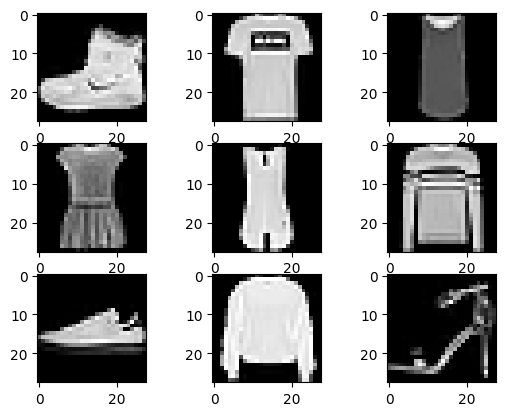

In [25]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i],cmap=plt.get_cmap("gray"))
plt.show()

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images=train_images/255.0

In [28]:
test_images=test_images/255.0

In [29]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical#one hot encoding
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [31]:
#conv layer
model=tf.keras.Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
#fully connected layer
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))

model.add(Dense(10,activation=tf.nn.softmax))

In [33]:
!pip install visualkeras

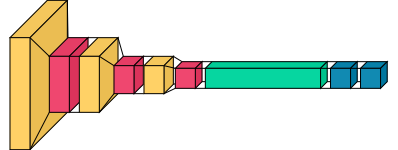

In [34]:
import visualkeras
visualkeras.layered_view(model)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

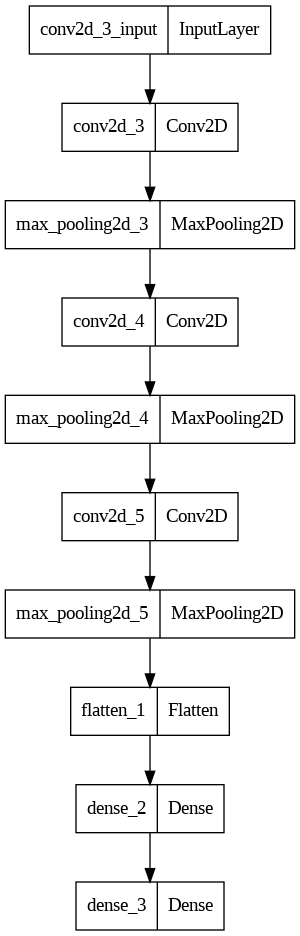

In [36]:
plot_model(model,to_file='model.png')

In [37]:
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [38]:
model.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4290 - accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2799 - accuracy: 0.8973
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2344 - accuracy: 0.9141
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2044 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1820 - accuracy: 0.9314
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1599 - accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1409 - accuracy: 0.9464
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9530
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1104 - accuracy: 0.9575
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

In [39]:
probability_layer=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [42]:
predictions=probability_layer.predict(test_images[0:1])

1/1 [==============================] - 0s 184ms/step


In [43]:
np.argmax(predictions)


9

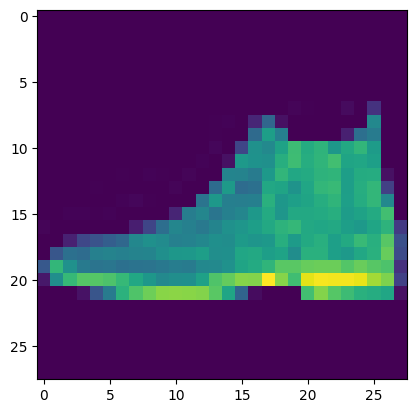

In [45]:
plt.imshow(test_images[0])